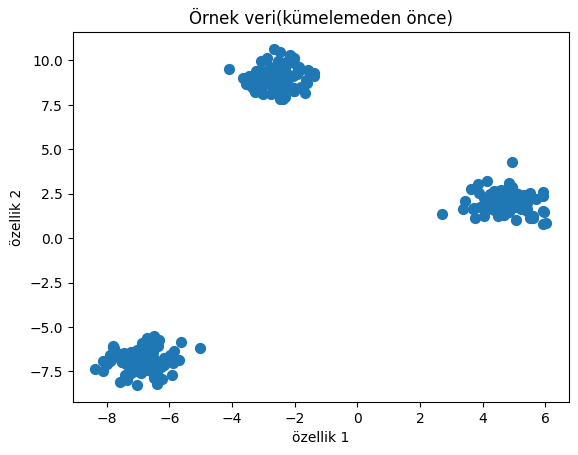

In [ ]:
#K Means
import numpy as np
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
#Örnek veri oluşturma
n_samples = 300
random_state = 42
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=random_state)
#Veriyi görselleştirme
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Örnek veri(kümelemeden önce)")
plt.xlabel("özellik 1")
plt.ylabel("özellik 2")
plt.show()


K - Means kümeleme
dirsek metodu keskin yatay bir dönüş olduğu zaman.
**Siluet Analizi**

---
her bir küme için yapılır.

1.   0 a yakın değerler belirsiz 1 e yakın değerler dengeli -1 e yakın değerler yanlış küme olarak adlandırılır.
2.   grafikte tepe noktasını alırım.







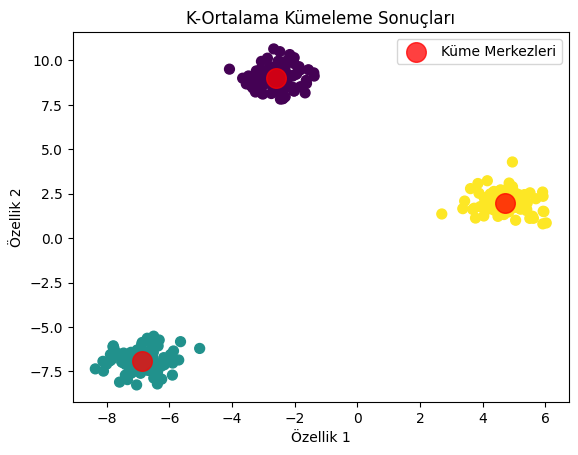

küme etiketleri:
[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
küme merkezleri:
[[-2.58361866  9.03185632]
 [-6.88217395 -6.94243433]
 [ 4.70421356  1.99562444]]


In [ ]:
# 1 K-ortalama modelini oluşturma ve eğitme
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

# 2 Küme merkezlerini alma
centers = kmeans.cluster_centers_

# 3 Sonuçları görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Küme Merkezleri')
plt.title('K-Ortalama Kümeleme Sonuçları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend()
plt.show()
#Küme etiketlerini yazdırma
print("küme etiketleri:")
print(y_kmeans)
#Küme merkezlerini yazdırma
print("küme merkezleri:")
print(centers)

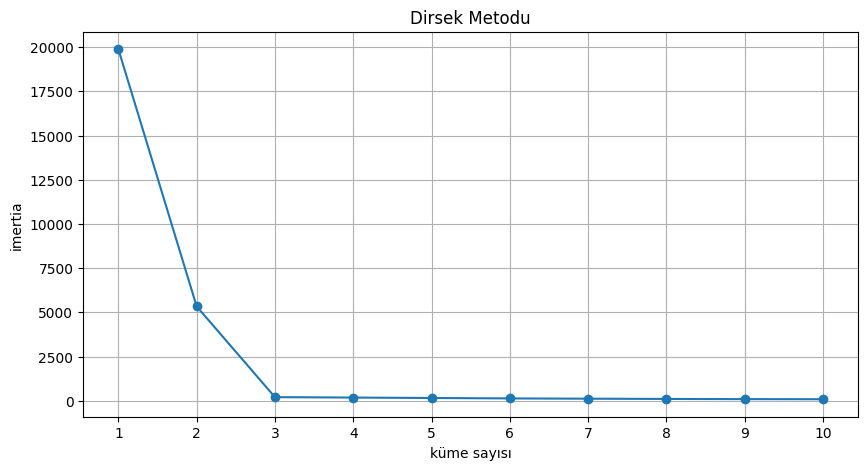

In [ ]:
#Dirsek metodu
imertia=[]
range_n_clusters=range(1,11)
for n_clusters in range_n_clusters:
  kmeans=KMeans(n_clusters=n_clusters,random_state=random_state)
  kmeans.fit(X)
  imertia.append(kmeans.inertia_)
#Dirsek  metodu ile grafiğini çizme
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, imertia, marker='o')
plt.title('Dirsek Metodu')
plt.xlabel('küme sayısı')
plt.ylabel('imertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

Küme Sayısı: 2, Ortalama Siluet Skoru: 0.7361
Küme Sayısı: 3, Ortalama Siluet Skoru: 0.9084
Küme Sayısı: 4, Ortalama Siluet Skoru: 0.7139
Küme Sayısı: 5, Ortalama Siluet Skoru: 0.5104
Küme Sayısı: 6, Ortalama Siluet Skoru: 0.3268
Küme Sayısı: 7, Ortalama Siluet Skoru: 0.3327
Küme Sayısı: 8, Ortalama Siluet Skoru: 0.3403
Küme Sayısı: 9, Ortalama Siluet Skoru: 0.3266
Küme Sayısı: 10, Ortalama Siluet Skoru: 0.3268


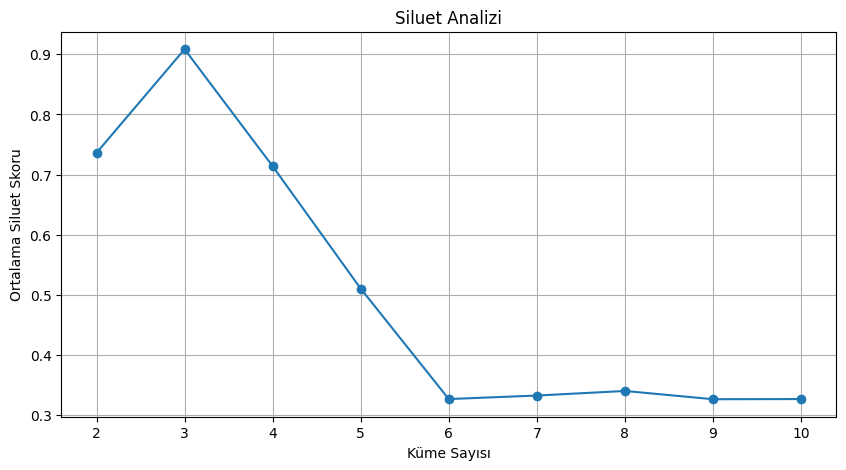

In [ ]:
# 2. Siluet Analizi
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_scores = []

for n_clusters in range_n_clusters[1:]:  # Küme sayısı 1 olamaz
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Küme Sayısı: {n_clusters}, Ortalama Siluet Skoru: {silhouette_avg:.4f}")
# Siluet Skoru Grafiğini Çizme
plt.figure(figsize=(10, 5))
plt.plot(range(2, n_clusters+1), silhouette_scores, marker='o')
plt.title('Siluet Analizi')
plt.xlabel('Küme Sayısı')
plt.ylabel('Ortalama Siluet Skoru')
plt.xticks(range(2, n_clusters+1))
plt.grid(True)
plt.show()


**Hiyerarşik Kümeleme**

1.   Tek bir kümeyi en küçük alt kümelere bölmeyi birbirine yakın olan kümeler ya aynı küme içerisinde ya da yakın kümelerde gösterilir.

1. Kümeleme süreci ağaç yapısıyla gösterilir.  
2.  Küme sayısı: nereden bölünürse o kadar küme ortaya çıkacaktır


4.   genetik analizi,sosyal analiz
1.   average,matrix,single min bağlantı
2.  







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
#Örnek veri oluşturma
n_samples = 50
random_state = 42
X, y =make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=random_state)
#Veriyi görselleştirme
linked_ward=linkage(X,method='ward')
linked_complete=linkage(X,method='complete')
linked_average=linkage(X,method='average')
linked_single=linkage(X,method='single')
plt.show()

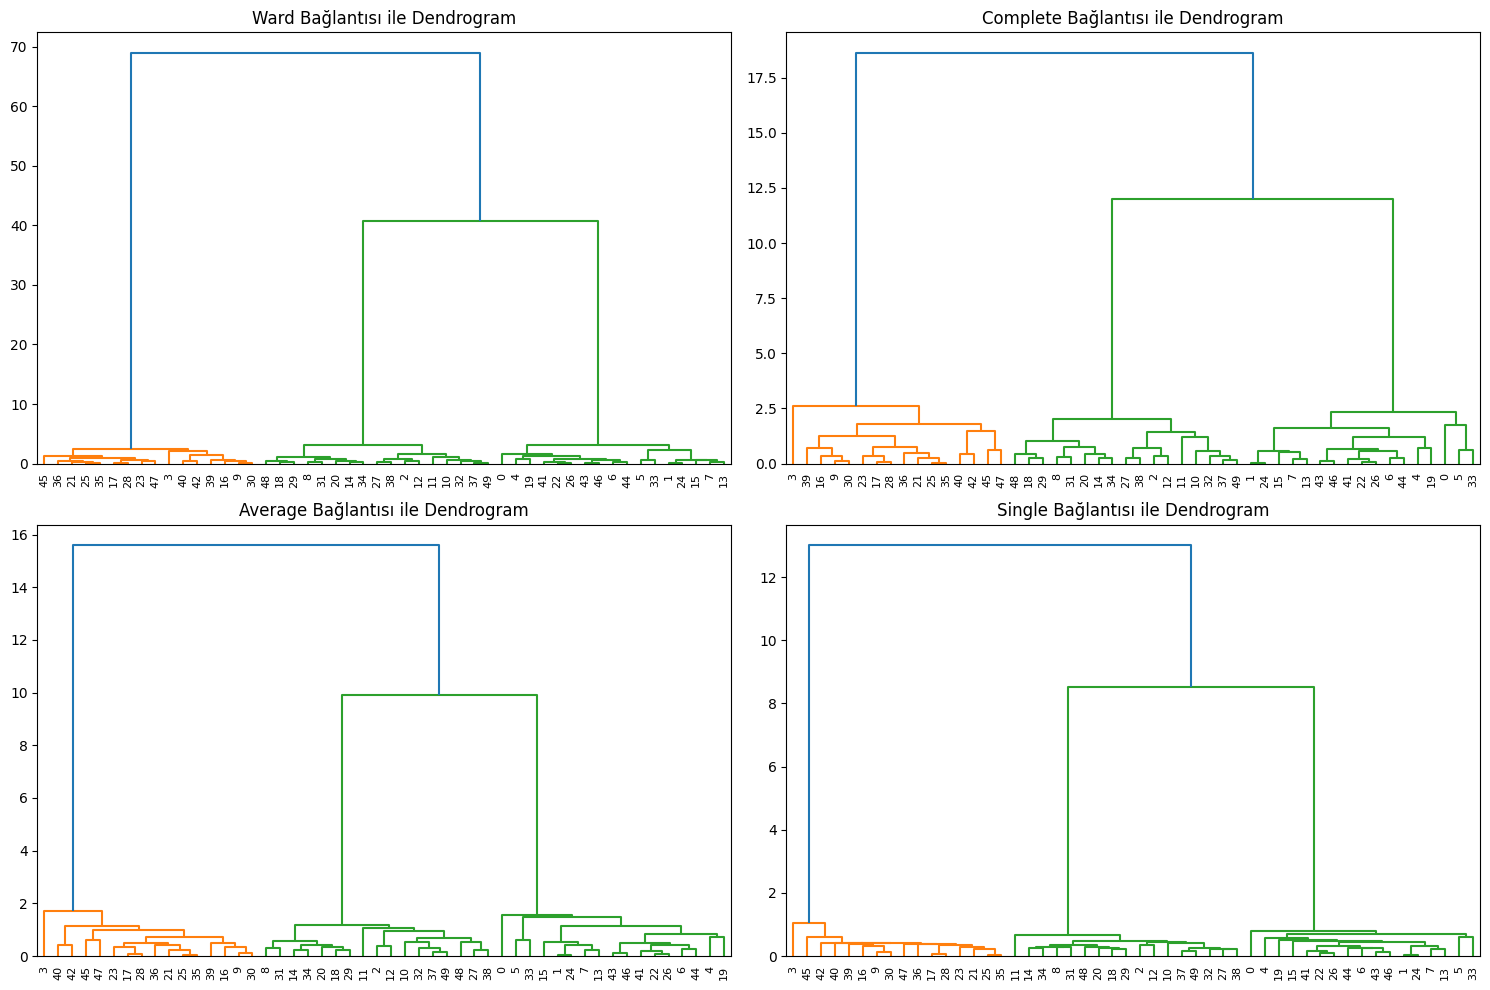

In [ ]:
# Dendrogramları görselleştirme
plt.figure(figsize=(15, 10))  # Şekil boyutunu ayarlar

plt.subplot(2, 2, 1)  # 2x2 grid, 1. grafik
dendrogram(linked_ward, orientation='top')
plt.title('Ward Bağlantısı ile Dendrogram')

plt.subplot(2, 2, 2)  # 2x2 grid, 2. grafik
dendrogram(linked_complete, orientation='top')
plt.title('Complete Bağlantısı ile Dendrogram')

plt.subplot(2, 2, 3)  # 2x2 grid, 3. grafik
dendrogram(linked_average, orientation='top')
plt.title('Average Bağlantısı ile Dendrogram')

plt.subplot(2, 2, 4)  # 2x2 grid, 4. grafik
dendrogram(linked_single, orientation='top')
plt.title('Single Bağlantısı ile Dendrogram')

plt.tight_layout()  # Grafiklerin çakışmasını önler
plt.show()  # Grafikleri gösterir


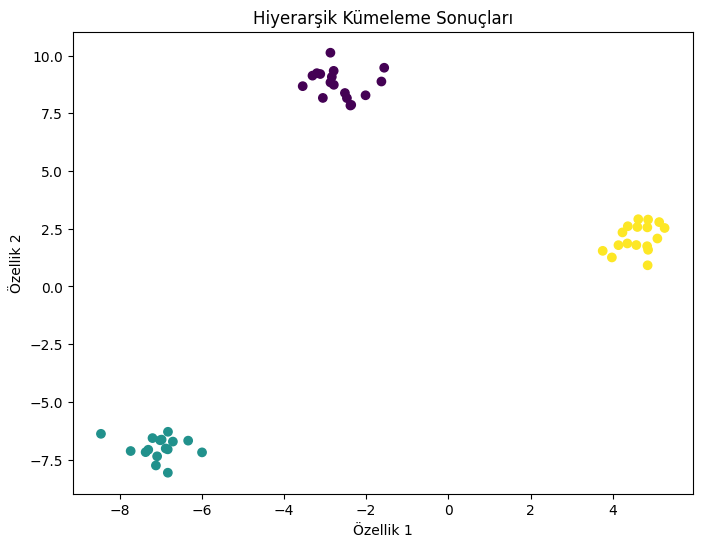

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # ❌ Çift virgül vardı
y_agg = agg_clustering.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis')
plt.title('Hiyerarşik Kümeleme Sonuçları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


**DBSCAN **

1.  aykırı değerleri tanımlamak için de kullanılıyor.
2.  mesafe ve min komşu sayısı

1.   Küme sayısını belirtmene gerek yok yoğunluğa göre kendisi bulabiliyor

1.  min nokta sayısı belli sayıdakiler komşu
2.  gürültü noktası aykırı değerlerimdir.


6.   coğrafi veri analizi,anomali tespitinede,gürültülü veri setlerinde kullanılıyor





**Çalışma Algoritması**

1.   rasgele işlenmemiş nokta seçilir.

1.   çekirdek nokta kontrolü

2.   eğer komşu sayısı


4. küme sayısı belirlemene gerek yok karmaşık şekillerde küme  

1.   yoğunluk değişimi olan verilerde zorlanabilir.

1.   parametre şeçimi
2.   Liste öğesi


2.   Liste öğesi





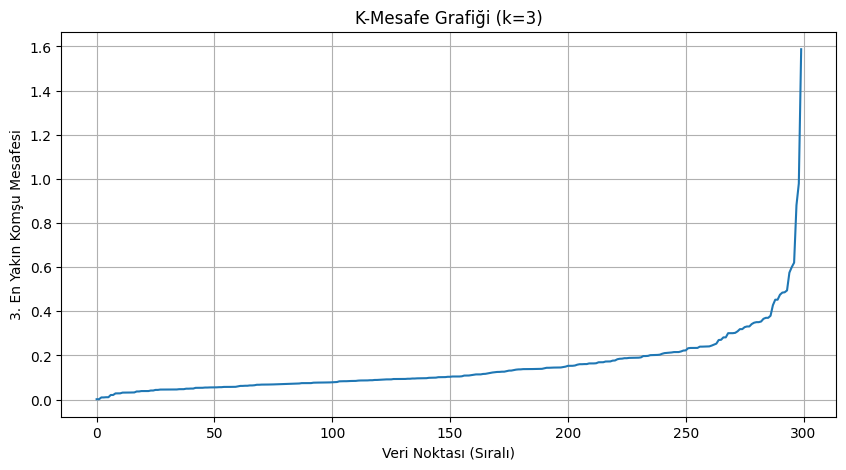

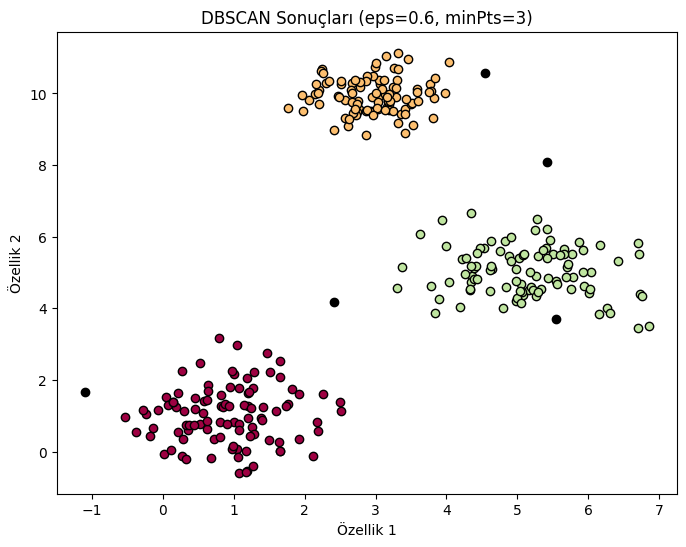

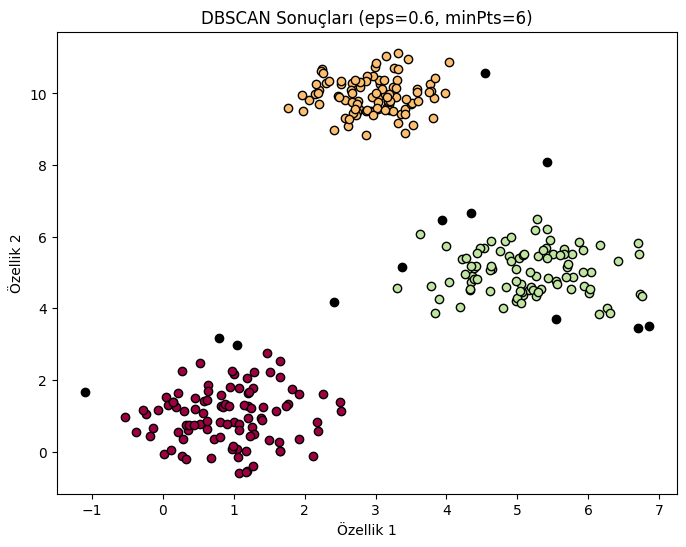

Küme Etiketleri (eps=0.6, minPts=3):
[ 0  0  1  2  0  0  1  0  0  2  0  0  1  1  1  0  0  0  0  2  1  1  0  1
  2  2  1  2  1  2  0  2  1  1  1  0  2  2  2  0  2  2  1  0  1  1  1  2
  1  1  0  0  1  2  2  2  1  0  2  1  0  2  0  2  1  2  1  0  1  1  2  2
  0  2  1  1  0  1  0  0  2  0  0  1  1  1  0  1  0  0  2  2  0  1  2  1
  2  0  0  0  0  0  2  1  0  0  2  0  1  1  2  2  2  0  1  2  1  0  1  1
  2  0  0  0  0  0  0  1  0  0  0  2  1  1  1  2  0  0  1  0  2 -1  0  2
  0  0  1  2  2  0  2  2  2  1  0  0  2  1  0  1  2  0  0  0  0  0  1  0
  1  1  1  0  2  1  1  0  1  2  2  1  2  0  2 -1  1  1  2  1  2  2  1  0
  1  0  0  2  2  0  1  1  1  2  0  0  2  2 -1  1  1  0  1  1  2  1  0  2
  1  1 -1  0  0  1  0  1  2  2  1  2  1  1  2  2  0  2  2  2  1  2  1  2
  2  2  1  2  0  0  2  1  1  2  1  1  0  0  0  1  0  2  2  1  2  2  0  0
  2  2  2  1  1  1  0  0  0  2  2  2  2  1  2  1  2  2  1  0  2  2 -1  1
  0  2  0  1  1  1  1  2  0  2  2  0]

Küme Etiketleri (eps=0.6, minPts=6):
[ 0  0  1  

In [ ]:
#DBSCAN Kümeleme
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Örnek veri oluşturma (daha karmaşık bir yapı)
n_samples = 300
random_state = 42
X, y = make_blobs(n_samples=n_samples, centers=[[1, 1], [5, 5], [3, 10]], cluster_std=[0.8, 0.8, 0.5], random_state=random_state)

# 1. Epsilon (eps) seçimi için K-Mesafe Grafiği
neighbors = NearestNeighbors(n_neighbors=4)  # minPts = 3 + 1
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # k=3 için mesafeler (en yakın 3. komşuya uzaklık)

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-Mesafe Grafiği (k=3)')
plt.xlabel('Veri Noktası (Sıralı)')
plt.ylabel('3. En Yakın Komşu Mesafesi')
plt.grid(True)
plt.show()

# Grafikten tahmini eps değeri seçimi (dirsek noktasına bakarak)
estimated_eps = 0.6

# 2. DBSCAN Uygulaması (tahmini eps ve minPts=3 ile)
dbscan = DBSCAN(eps=estimated_eps, min_samples=3)
clusters = dbscan.fit_predict(X)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Gürültü siyah renkte
    class_member_mask = (clusters == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title(f'DBSCAN Sonuçları (eps={estimated_eps}, minPts=3)')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

# 3. DBSCAN Uygulaması (farklı minPts ile)
dbscan_alt = DBSCAN(eps=estimated_eps, min_samples=6)
clusters_alt = dbscan_alt.fit_predict(X)

# Alternatif sonuçları görselleştirme
plt.figure(figsize=(8, 6))
unique_labels_alt = set(clusters_alt)
colors_alt = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_alt))]
for k, col in zip(unique_labels_alt, colors_alt):
    if k == -1:
        col = 'k'  # Gürültü siyah renkte
    class_member_mask = (clusters_alt == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title(f'DBSCAN Sonuçları (eps={estimated_eps}, minPts=6)')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

# Küme etiketlerini yazdırma
print("Küme Etiketleri (eps={}, minPts=3):".format(estimated_eps))
print(clusters)
print("\nKüme Etiketleri (eps={}, minPts=6):".format(estimated_eps))
print(clusters_alt)

Gaussian Modelleme

1.   EM algoritması kullanarak beklentiyi maximize etmek
2.   Yumuşak kümeleme adını vrdiğimiz bir kümeleme yapar

1.   Kümeleme işlemi olasılığa bağlı



2.  Esneklik ve karmaşık dağılımları da modelleyebilir.


5. Ses tanıma görüntü işleme
2. K bileşen K cluster

1.   Preprocessing ve görselleştirme önemli
2.   CNN ortalama vektörünü temsil eder.









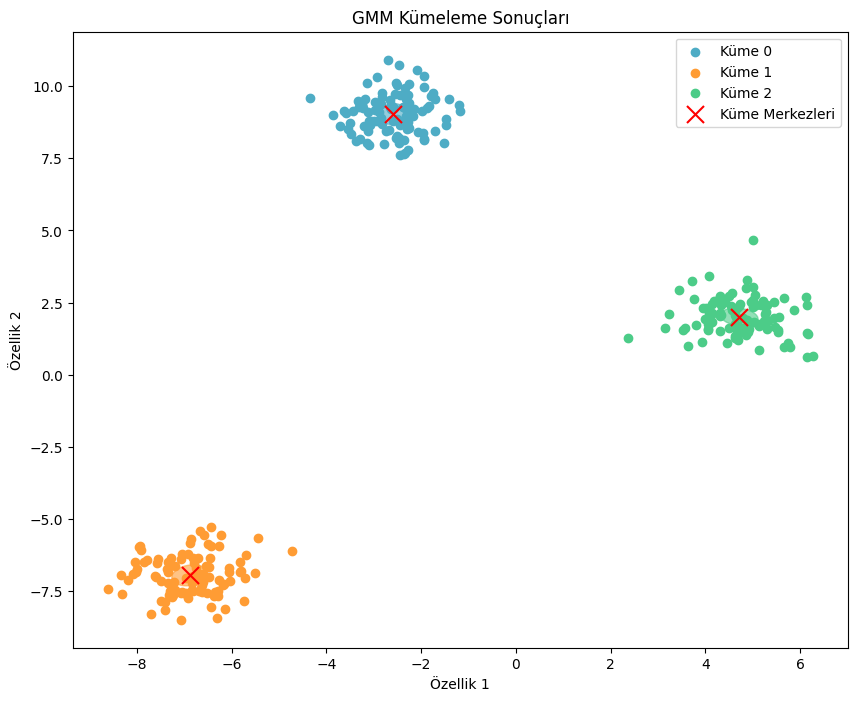

İlk 5 Veri Noktası için Küme Olasılıkları:
[[8.85406776e-132 1.00000000e+000 3.23154485e-118]
 [2.12835851e-128 1.00000000e+000 1.02212557e-117]
 [1.00000000e+000 2.14750303e-108 1.16652866e-034]
 [2.51418597e-050 4.75701383e-090 1.00000000e+000]
 [2.25980563e-138 1.00000000e+000 3.47705056e-131]]

Küme Etiketleri:
[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]

Gauss Bileşenlerinin Ortalamaları:
[[-2.59602216  9.03478469]
 [-6.88259

In [ ]:
#GMM Kümeleme
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
from scipy.stats import multivariate_normal

# Örnek veri oluşturma
n_samples = 300
random_state = 42
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.70, random_state=random_state)

# GMM modelini oluşturma ve eğitme
n_components = 3  # Küme sayısı (Gauss bileşeni sayısı)
gmm = GaussianMixture(n_components=n_components, random_state=random_state, n_init=10)
gmm.fit(X)

# Küme etiketlerini tahmin etme
labels = gmm.predict(X)
probs = gmm.predict_proba(X)

# Gauss bileşenlerinin parametrelerini alma
means = gmm.means_
covariances = gmm.covariances_

# Sonuçları görselleştirme
plt.figure(figsize=(10, 8))
colors = ['#4EACC5', '#FF9C34', '#4CCC88']

for i in range(n_components):
    data = X[labels == i]
    plt.scatter(data[:, 0], data[:, 1], marker='o', color=colors[i], label=f'Küme {i}')

    # Gauss bileşenlerinin elipslerini çizdirme
    if covariances.ndim == 2:
        cov = covariances
    else:
        cov = covariances[i]

    try:
        v, w = np.linalg.eigh(cov)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi
        ell = mpatches.Ellipse(means[i], v[0]*0.5 * 3, v[1]*0.5 * 3, angle=angle, color=colors[i], alpha=0.3)
        ell.set_clip_box(plt.gca().bbox)
        ell.set_alpha(0.6)
        plt.gca().add_artist(ell)
    except np.linalg.LinAlgError as e:
        print(f"Uyarı: Kovaryans matrisi tekil olabilir. Elips çizilemiyor. Hata: {e}")
        continue # Bu bileşen için elips çizimini atla

plt.scatter(means[:, 0], means[:, 1], marker='x', color='red', s=150, label='Küme Merkezleri')
plt.title('GMM Kümeleme Sonuçları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend(loc='best')
plt.show()

# İlk 5 veri noktası için küme olasılıklarını yazdırma
print("İlk 5 Veri Noktası için Küme Olasılıkları:")
print(probs[:5])

# Küme etiketlerini yazdırma
print("\nKüme Etiketleri:")
print(labels)

# Gauss bileşenlerinin ortalamalarını yazdırma
print("\nGauss Bileşenlerinin Ortalamaları:")
print(means)

# Gauss bileşenlerinin kovaryanslarını yazdırma
print("\nGauss Bileşenlerinin Kovaryansları:")
print(covariances)

Orijinal Verinin İlk 5 Satırı (Ölçeklendirilmiş):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


<Figure size 1000x800 with 0 Axes>

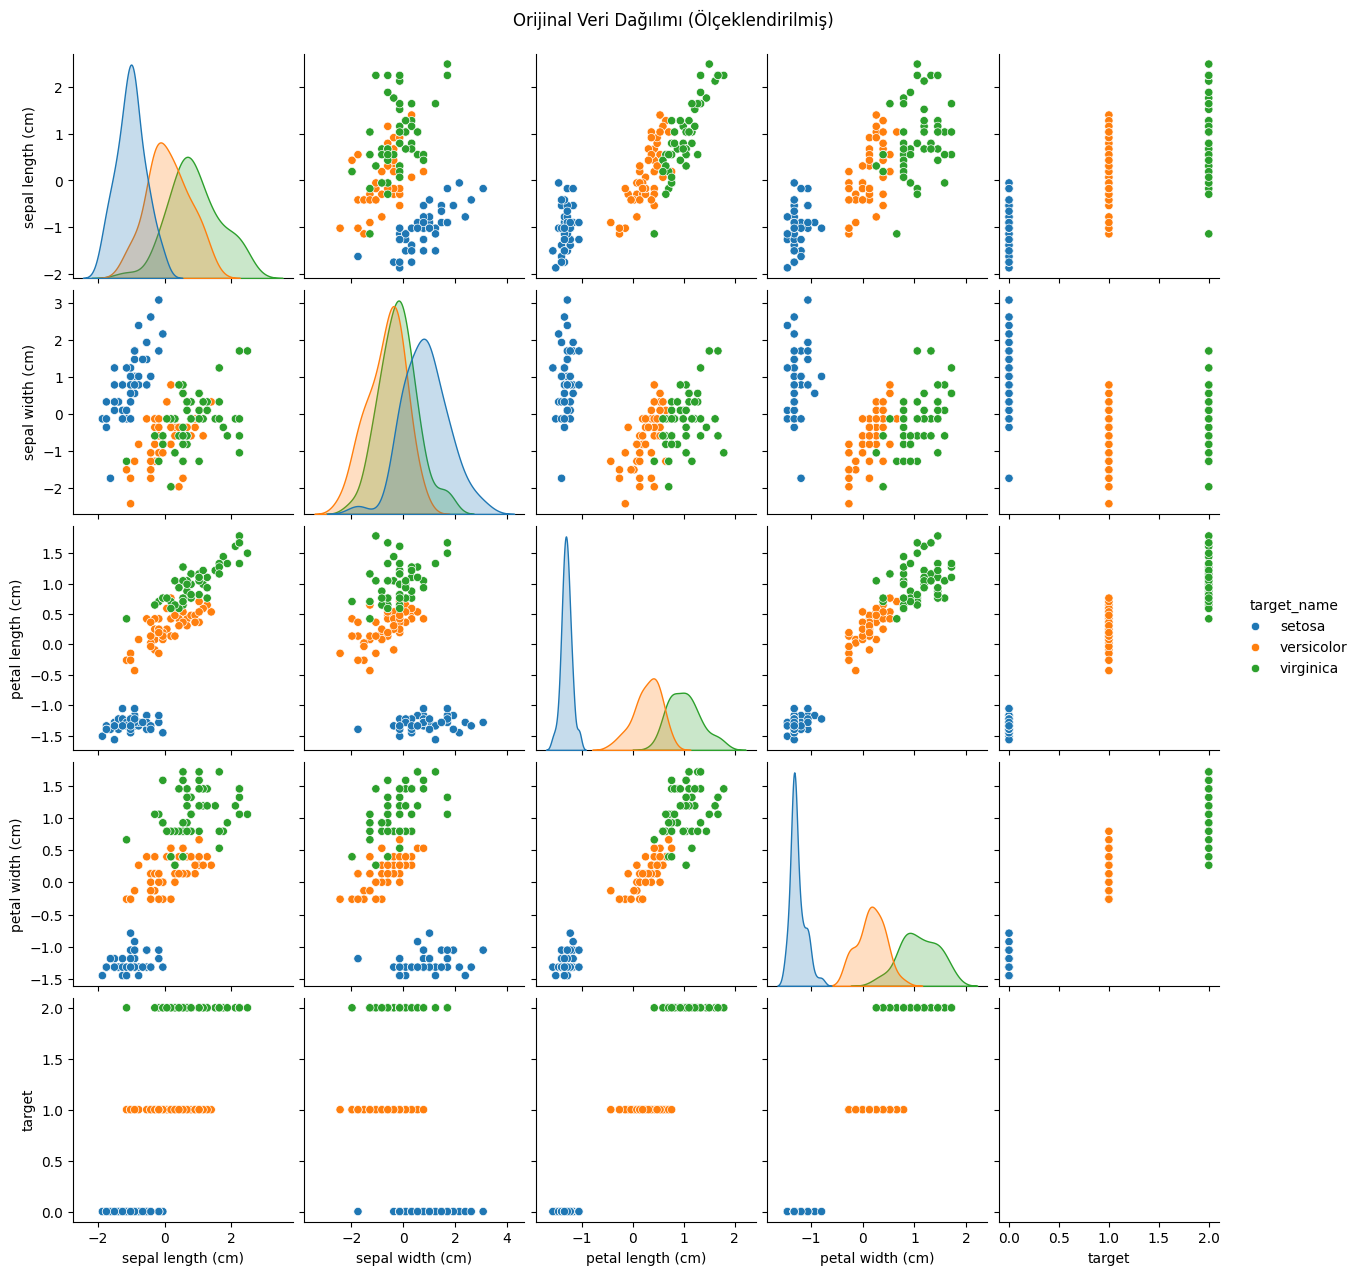


PCA Sonrası Verinin İlk 5 Satırı:
   PCA Bileşen 1  PCA Bileşen 2  target target_name
0      -2.264703       0.480027       0      setosa
1      -2.080961      -0.674134       0      setosa
2      -2.364229      -0.341908       0      setosa
3      -2.299384      -0.597395       0      setosa
4      -2.389842       0.646835       0      setosa

Açıklanan Varyans Oranları (İlk 2 Bileşen): [0.72962445 0.22850762]


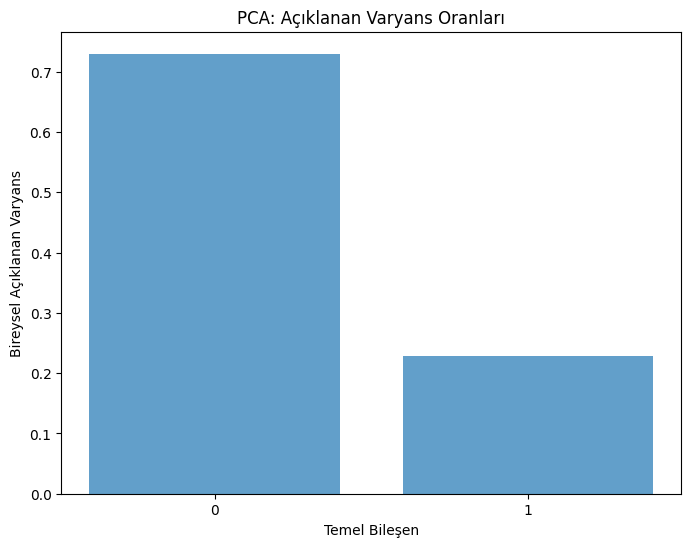

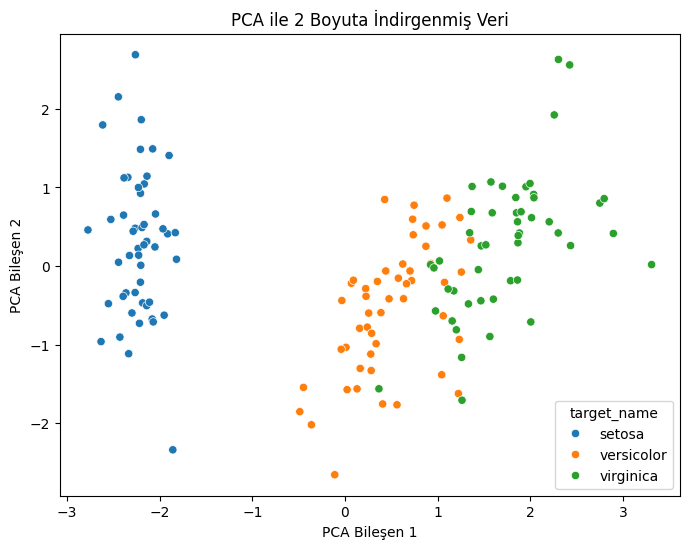

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



t-SNE Sonrası Verinin İlk 5 Satırı:
   t-SNE Boyut 1  t-SNE Boyut 2  target target_name
0     -10.772038       0.503886       0      setosa
1      -9.496029      -2.616418       0      setosa
2     -10.454597      -2.006003       0      setosa
3     -10.349504      -2.666777       0      setosa
4     -10.406443       1.028004       0      setosa


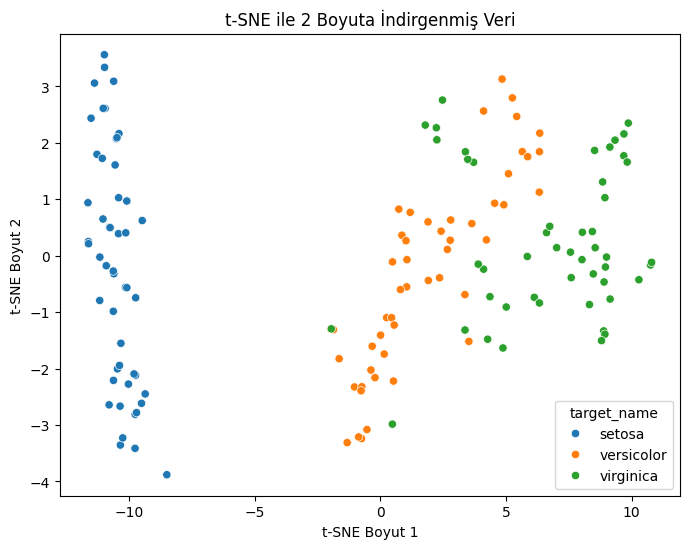


PCA ve t-SNE Karşılaştırması:
  Algoritma                                             Amaç  \
0       PCA          Varyansı Maksimize Eden Boyutlar Bulmak   
1     t-SNE  Yüksek Boyutlu Komşulukları Düşük Boyuta Koruma   

  Lineer/Non-Lineer Global Yapıyı Koruma Yerel Yapıyı Koruma  Parametreler  \
0            Lineer                  İyi                Orta  n_components   
1        Non-Lineer         Zorlayabilir             Çok İyi             -   

                       Uygulama Alanları  
0  Gürültü Azaltma, Hızlı Görselleştirme  
1     Yüksek Boyutlu Veri Görselleştirme  


In [ ]:
#PCA ve t-SNE Örneği
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# 1. İris Veri Setini Yükleme ve Ön İşleme
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Veriyi ölçeklendirme (PCA ve t-SNE performansı için önemlidir)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Orijinal Verinin İlk Birkaç Satırı ve Dağılımı (Tablo ve Saçılım Matrisi)
print("Orijinal Verinin İlk 5 Satırı (Ölçeklendirilmiş):")
print(pd.DataFrame(X_scaled, columns=feature_names).head())

df_original = pd.DataFrame(X_scaled, columns=feature_names)
df_original['target'] = y
df_original['target_name'] = df_original['target'].apply(lambda x: target_names[x])

plt.figure(figsize=(10, 8))
sns.pairplot(df_original, hue='target_name')
plt.suptitle("Orijinal Veri Dağılımı (Ölçeklendirilmiş)", y=1.02)
plt.show()

# 2. PCA ile Boyut İndirgeme (4 boyuttan 2 boyuta)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA Sonrası Verinin İlk Birkaç Satırı ve Varyans Oranları (Tablo ve Çizgi Grafiği)
df_pca = pd.DataFrame(data=X_pca, columns=['PCA Bileşen 1', 'PCA Bileşen 2'])
df_pca['target'] = y
df_pca['target_name'] = df_pca['target'].apply(lambda x: target_names[x])

print("\nPCA Sonrası Verinin İlk 5 Satırı:")
print(df_pca.head())

explained_variance_ratio = pca.explained_variance_ratio_
print("\nAçıklanan Varyans Oranları (İlk 2 Bileşen):", explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.bar(range(pca.n_components_), explained_variance_ratio, alpha=0.7, align='center')
plt.ylabel('Bireysel Açıklanan Varyans')
plt.xlabel('Temel Bileşen')
plt.title('PCA: Açıklanan Varyans Oranları')
plt.xticks(range(pca.n_components_))
plt.show()

# PCA Sonrası Verinin Görselleştirilmesi (Saçılım Grafiği)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA Bileşen 1', y='PCA Bileşen 2', hue='target_name', data=df_pca)
plt.title('PCA ile 2 Boyuta İndirgenmiş Veri')
plt.xlabel('PCA Bileşen 1')
plt.ylabel('PCA Bileşen 2')
plt.show()

# 3. t-SNE ile Boyut İndirgeme (4 boyuttan 2 boyuta)
tsne = TSNE(n_components=2, random_state=random_state, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# t-SNE Sonrası Verinin İlk Birkaç Satırı (Tablo)
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Boyut 1', 't-SNE Boyut 2'])
df_tsne['target'] = y
df_tsne['target_name'] = df_tsne['target'].apply(lambda x: target_names[x])

print("\nt-SNE Sonrası Verinin İlk 5 Satırı:")
print(df_tsne.head())

# t-SNE Sonrası Verinin Görselleştirilmesi (Saçılım Grafiği)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE Boyut 1', y='t-SNE Boyut 2', hue='target_name', data=df_tsne)
plt.title('t-SNE ile 2 Boyuta İndirgenmiş Veri')
plt.xlabel('t-SNE Boyut 1')
plt.ylabel('t-SNE Boyut 2')
plt.show()

# 4. Karşılaştırma Tablosu
comparison_data = {
    'Algoritma': ['PCA', 't-SNE'],
    'Amaç': ['Varyansı Maksimize Eden Boyutlar Bulmak', 'Yüksek Boyutlu Komşulukları Düşük Boyuta Koruma'],
    'Lineer/Non-Lineer': ['Lineer', 'Non-Lineer'],
    'Global Yapıyı Koruma': ['İyi', 'Zorlayabilir'],
    'Yerel Yapıyı Koruma': ['Orta', 'Çok İyi'],
    'Parametreler': ['n_components', '-'], # t-SNE'nin önemli parametreleri var ama özet için '-'
    'Uygulama Alanları': ['Gürültü Azaltma, Hızlı Görselleştirme', 'Yüksek Boyutlu Veri Görselleştirme']
}
df_comparison = pd.DataFrame(comparison_data)
print("\nPCA ve t-SNE Karşılaştırması:")
print(df_comparison)ss